# Character-Level Language Model (TinyLLM-like)

A simple character-level language model built with PyTorch that learns to predict the next character in a sequence. This project demonstrates the fundamentals of neural language modeling using a lightweight architecture.

## Overview

This model implements a character-level neural network that can:
- Learn patterns from text data
- Predict the next character given a context
- Generate new text based on learned patterns

The architecture is intentionally simple, making it ideal for educational purposes and for understanding the basics of language modeling before moving to more complex architectures.

## Features

- **Character-level tokenization**: Converts text into character indices
- **Embedding-based representation**: Maps characters to dense vector representations
- **Simple feed-forward architecture**: Uses embedding → flatten → hidden → output layers
- **Training with metrics**: Tracks loss and accuracy during training
- **Next-character prediction**: Predicts the most likely next character
- **Text generation**: Creates new text from a seed string

## Requirements

- Python 3.6+
- PyTorch 1.7+
- NumPy
- Matplotlib

## Quick Start

```python
# Import the code
from tiny_llm import CharacterDataset, TinyLLM, train_model, predict_next_char, generate_text

# Define your training text
text = "hello world. this is a tiny language model. it can learn simple patterns from text data."

# Create dataset and model
dataset = CharacterDataset(text, context_size=3)
model = TinyLLM(vocab_size=dataset.get_vocab_size(), embedding_dim=16, hidden_dim=32, context_size=3)

# Train the model
losses, accuracies = train_model(model, dataset, epochs=20, batch_size=8, learning_rate=0.01)

# Make predictions
next_char, prob = predict_next_char(model, dataset, "hel")
print(f"Predicted next character: '{next_char}' with probability {prob:.4f}")

# Generate text
generated_text = generate_text(model, dataset, seed_text="hel", length=30)
print(f"Generated text: {generated_text}")
```

## Model Architecture

The model consists of the following components:

1. **Embedding Layer**: Converts character indices to dense vectors (dimension: `embedding_dim`)
2. **Flattening Operation**: Reshapes the embedded context for the linear layer
3. **Hidden Layer**: A linear layer with ReLU activation (dimension: `hidden_dim`)
4. **Output Layer**: Produces logits for each character in the vocabulary

## Debugging Features

The implementation includes several debugging checkpoints:

- **Tokenization**: Displays samples from the dataset after tokenization
- **Forward Pass**: Prints tensor shapes at each stage of the forward pass
- **Training**: Shows loss and accuracy after each epoch
- **Prediction**: Displays top predictions with their probabilities

## Example Usage

### Predicting the Next Character

```python
# Sample inputs and their predictions
sample_inputs = ["hel", "wor", "thi"]

for sample in sample_inputs:
    next_char, prob = predict_next_char(model, dataset, sample)
    print(f"Input: '{sample}' -> Predicted: '{next_char}' (p={prob:.4f})")
```

### Generating Text

```python
# Generate 30 characters of text starting with "hel"
generated_text = generate_text(model, dataset, seed_text="hel", length=30)
print(f"Generated text: {generated_text}")
```

## Customization

You can customize the model by adjusting these hyperparameters:

- `context_size`: Number of characters to use as input context
- `embedding_dim`: Dimension of character embeddings
- `hidden_dim`: Size of hidden layer
- `learning_rate`: Controls the speed of training
- `batch_size`: Number of samples processed together
- `epochs`: Number of complete passes through the training data

## Limitations and Future Improvements

This model serves as an educational starting point. For better performance, consider:

1. Increasing model capacity with more layers or recurrent/transformer architectures
2. Moving to word-level or subword-level tokenization
3. Using larger and more diverse training data
4. Implementing temperature scaling for more diverse text generation
5. Adding attention mechanisms for handling longer contexts

## Google Colab Support

This model is designed to run in Google Colab without any special requirements. Simply copy the code into a Colab notebook and execute it.

## License

MIT License - Feel free to use, modify, and distribute this code for educational purposes.

Text: 'hello world. this is a tiny language model. it can learn simple patterns from text data. let's see how well it works!'
Vocabulary: [' ', '!', "'", '.', 'a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'w', 'x', 'y']
Vocabulary size: 25

----- TOKENIZATION CHECKPOINT -----
Sample 1: Input 'hel' -> Target 'l'
Sample 2: Input 'ell' -> Target 'o'
Sample 3: Input 'llo' -> Target ' '

----- MODEL ARCHITECTURE -----
TinyLLM(
  (embedding): Embedding(25, 16)
  (hidden): Linear(in_features=48, out_features=32, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=32, out_features=25, bias=True)
)

----- FORWARD PASS CHECKPOINT -----
Shape after embedding: torch.Size([1, 3, 16])
Shape after flattening: torch.Size([1, 48])
Shape after hidden layer: torch.Size([1, 32])
Shape of output logits: torch.Size([1, 25])
Input shape: torch.Size([1, 3])
Output shape: torch.Size([1, 25])

----- TRAINING CHECKPOINT -----
Shape after embedding: torch.Size([8

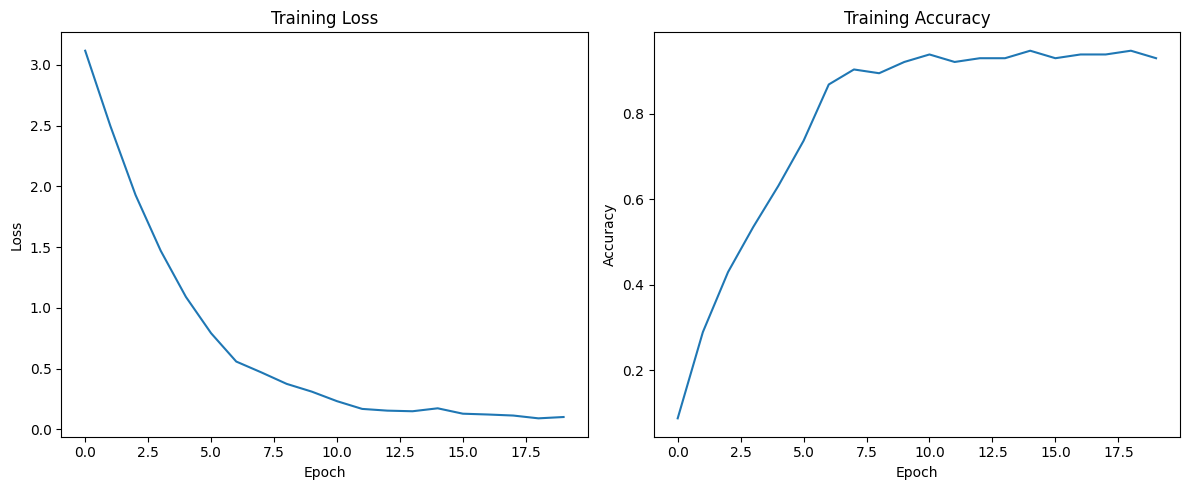


----- SAMPLE INPUTS/OUTPUTS -----
Shape after embedding: torch.Size([1, 3, 16])
Shape after flattening: torch.Size([1, 48])
Shape after hidden layer: torch.Size([1, 32])
Shape of output logits: torch.Size([1, 25])

Predictions for context 'hel':
  1. 'l' with probability 0.9941
  2. ' ' with probability 0.0048
  3. 'k' with probability 0.0005
Input: 'hel' -> Predicted next character: 'l' (probability: 0.9941)
Shape after embedding: torch.Size([1, 3, 16])
Shape after flattening: torch.Size([1, 48])
Shape after hidden layer: torch.Size([1, 32])
Shape of output logits: torch.Size([1, 25])

Predictions for context 'wor':
  1. 'l' with probability 0.5074
  2. 'k' with probability 0.4824
  3. 'n' with probability 0.0040
Input: 'wor' -> Predicted next character: 'l' (probability: 0.5074)
Shape after embedding: torch.Size([1, 3, 16])
Shape after flattening: torch.Size([1, 48])
Shape after hidden layer: torch.Size([1, 32])
Shape of output logits: torch.Size([1, 25])

Predictions for context 't

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Set random seed for reproducibility
torch.manual_seed(42)

# ----- DATA PREPARATION -----

# Custom dataset for character-level language modeling
class CharacterDataset(Dataset):
    def __init__(self, text, context_size=3):
        """
        Initialize the character-level dataset.

        Args:
            text (str): The training text
            context_size (int): Number of characters to use as context
        """
        self.text = text
        self.context_size = context_size

        # Create character to index mapping
        self.chars = sorted(list(set(text)))
        self.char_to_idx = {ch: i for i, ch in enumerate(self.chars)}
        self.idx_to_char = {i: ch for i, ch in enumerate(self.chars)}
        self.vocab_size = len(self.chars)

        # Create training samples
        self.X = []
        self.y = []

        for i in range(len(text) - context_size):
            context = text[i:i+context_size]
            target = text[i+context_size]

            # Convert characters to indices
            context_idx = [self.char_to_idx[c] for c in context]
            target_idx = self.char_to_idx[target]

            self.X.append(context_idx)
            self.y.append(target_idx)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.long), torch.tensor(self.y[idx], dtype=torch.long)

    def get_vocab_size(self):
        return self.vocab_size

    def decode(self, indices):
        """Convert a list of indices back to characters"""
        return ''.join([self.idx_to_char[idx.item()] for idx in indices])

# ----- MODEL DEFINITION -----

class TinyLLM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=16, hidden_dim=32, context_size=3):
        """
        Initialize the TinyLLM model.

        Args:
            vocab_size (int): Size of the vocabulary
            embedding_dim (int): Dimension of character embeddings
            hidden_dim (int): Dimension of hidden layer
            context_size (int): Number of characters in the input context
        """
        super(TinyLLM, self).__init__()

        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.context_size = context_size

        # Embedding layer: maps character indices to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # After embedding, the shape will be [batch_size, context_size, embedding_dim]
        # We'll flatten this to [batch_size, context_size * embedding_dim]

        # Linear hidden layer with ReLU activation
        self.hidden = nn.Linear(context_size * embedding_dim, hidden_dim)
        self.relu = nn.ReLU()

        # Output layer: produces logits for each possible next character
        self.output = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, context_size]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, vocab_size]
        """
        # [batch_size, context_size] -> [batch_size, context_size, embedding_dim]
        embedded = self.embedding(x)

        # Checkpoint: Print shape after embedding
        print(f"Shape after embedding: {embedded.shape}")

        # Flatten the embedded context
        # [batch_size, context_size, embedding_dim] -> [batch_size, context_size * embedding_dim]
        flattened = embedded.view(embedded.size(0), -1)

        # Checkpoint: Print shape after flattening
        print(f"Shape after flattening: {flattened.shape}")

        # Pass through hidden layer with ReLU activation
        hidden = self.relu(self.hidden(flattened))

        # Checkpoint: Print shape after hidden layer
        print(f"Shape after hidden layer: {hidden.shape}")

        # Output layer produces logits for next character prediction
        logits = self.output(hidden)

        # Checkpoint: Print shape of output logits
        print(f"Shape of output logits: {logits.shape}")

        return logits

# ----- TRAINING FUNCTION -----

def train_model(model, dataset, epochs=10, batch_size=32, learning_rate=0.01):
    """
    Train the TinyLLM model.

    Args:
        model (nn.Module): The model to train
        dataset (Dataset): The dataset to train on
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training
        learning_rate (float): Learning rate for optimizer

    Returns:
        tuple: Lists of losses and accuracies per epoch
    """
    # Create DataLoader
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store metrics
    losses = []
    accuracies = []

    # Training loop
    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0

        # Disable print statements after first epoch to reduce output
        verbose = (epoch == 0)

        for X_batch, y_batch in dataloader:
            # Forward pass
            logits = model(X_batch)

            # Calculate loss
            loss = criterion(logits, y_batch)
            total_loss += loss.item()

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(logits, 1)
            correct_predictions += (predicted == y_batch).sum().item()
            total_predictions += y_batch.size(0)

        # Calculate epoch metrics
        epoch_loss = total_loss / len(dataloader)
        epoch_accuracy = correct_predictions / total_predictions

        # Store metrics
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)

        # Print epoch results
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    return losses, accuracies

# ----- PREDICTION FUNCTION -----

def predict_next_char(model, dataset, context, topk=3):
    """
    Predict the next character given a context.

    Args:
        model (nn.Module): Trained model
        dataset (CharacterDataset): Dataset containing character mappings
        context (str): Context string to predict from
        topk (int): Number of top predictions to return

    Returns:
        tuple: Most likely next character and probability
    """
    model.eval()  # Set to evaluation mode

    # Make sure context is the right length for the model
    if len(context) > model.context_size:
        context = context[-model.context_size:]
    elif len(context) < model.context_size:
        # Pad with spaces if context is too short (less likely scenario)
        context = ' ' * (model.context_size - len(context)) + context

    # Convert context to indices
    context_idx = [dataset.char_to_idx.get(c, 0) for c in context]  # Use 0 as default if char not found
    x = torch.tensor([context_idx], dtype=torch.long)

    # Get model prediction
    with torch.no_grad():
        logits = model(x)

    # Convert logits to probabilities
    probabilities = torch.softmax(logits, dim=1)

    # Get top k predictions
    topk_probs, topk_indices = torch.topk(probabilities, topk, dim=1)

    # Print top predictions and their probabilities
    print(f"\nPredictions for context '{context}':")
    for i in range(topk):
        char_idx = topk_indices[0][i].item()
        prob = topk_probs[0][i].item()
        char = dataset.idx_to_char[char_idx]
        print(f"  {i+1}. '{char}' with probability {prob:.4f}")

    # Return most likely character and its probability
    best_idx = topk_indices[0][0].item()
    best_char = dataset.idx_to_char[best_idx]
    best_prob = topk_probs[0][0].item()

    return best_char, best_prob

# ----- TEXT GENERATION FUNCTION -----

def generate_text(model, dataset, seed_text, length=20):
    """
    Generate text from the model.

    Args:
        model (nn.Module): Trained model
        dataset (CharacterDataset): Dataset containing character mappings
        seed_text (str): Starting text for generation
        length (int): Number of characters to generate

    Returns:
        str: Generated text
    """
    model.eval()  # Set to evaluation mode
    context_size = model.context_size

    # Make sure seed text is the right length for the model
    if len(seed_text) > context_size:
        context = seed_text[-context_size:]
    else:
        # Pad with spaces if seed is too short
        context = ' ' * (context_size - len(seed_text)) + seed_text

    result = seed_text

    print(f"\nGenerating text from seed: '{seed_text}'")
    print(f"Context: '{context}'")

    # Generate characters one by one
    for _ in range(length):
        # Convert context to indices
        context_idx = [dataset.char_to_idx.get(c, 0) for c in context]  # Use 0 as default if char not found
        x = torch.tensor([context_idx], dtype=torch.long)

        # Get model prediction
        with torch.no_grad():
            logits = model(x)

        # Convert logits to probabilities
        probabilities = torch.softmax(logits, dim=1)

        # Sample from the distribution
        next_char_idx = torch.multinomial(probabilities, 1).item()
        next_char = dataset.idx_to_char[next_char_idx]

        # Update context and result
        context = context[1:] + next_char
        result += next_char

        print(f"Next char: '{next_char}', Updated context: '{context}'")

    return result

# ----- MAIN EXECUTION -----

def main():
    # Define training text
    text = "hello world. this is a tiny language model. it can learn simple patterns from text data. let's see how well it works!"

    # Create dataset
    context_size = 3
    dataset = CharacterDataset(text, context_size=context_size)

    # Print dataset information
    print(f"Text: '{text}'")
    print(f"Vocabulary: {dataset.chars}")
    print(f"Vocabulary size: {dataset.vocab_size}")

    # Checkpoint: Show sample from dataset
    print("\n----- TOKENIZATION CHECKPOINT -----")
    for i in range(3):
        X, y = dataset[i]
        context_chars = dataset.decode(X)
        target_char = dataset.idx_to_char[y.item()]
        print(f"Sample {i+1}: Input '{context_chars}' -> Target '{target_char}'")

    # Create model
    vocab_size = dataset.get_vocab_size()
    model = TinyLLM(vocab_size, embedding_dim=16, hidden_dim=32, context_size=context_size)

    # Print model information
    print("\n----- MODEL ARCHITECTURE -----")
    print(model)

    # Test a forward pass
    print("\n----- FORWARD PASS CHECKPOINT -----")
    X_sample, y_sample = dataset[0]
    X_sample = X_sample.unsqueeze(0)  # Add batch dimension
    output = model(X_sample)
    print(f"Input shape: {X_sample.shape}")
    print(f"Output shape: {output.shape}")

    # Train the model
    print("\n----- TRAINING CHECKPOINT -----")
    losses, accuracies = train_model(model, dataset, epochs=20, batch_size=8, learning_rate=0.01)

    # Plot training metrics
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    # Test the model with sample inputs
    print("\n----- SAMPLE INPUTS/OUTPUTS -----")
    sample_inputs = ["hel", "wor", "thi"]

    for sample in sample_inputs:
        next_char, prob = predict_next_char(model, dataset, sample)
        print(f"Input: '{sample}' -> Predicted next character: '{next_char}' (probability: {prob:.4f})")

    # Test with custom string
    custom_test = "the "
    print("\n----- CUSTOM TEST STRING -----")
    next_char, prob = predict_next_char(model, dataset, custom_test)
    print(f"Input: '{custom_test}' -> Predicted next character: '{next_char}' (probability: {prob:.4f})")

    # Generate text
    print("\n----- TEXT GENERATION -----")
    seed = "hel"
    generated_text = generate_text(model, dataset, seed, length=30)
    print(f"\nGenerated text (seed: '{seed}'): '{generated_text}'")

    # Final thoughts
    print("\n----- FUTURE IMPROVEMENTS -----")
    print("1. Increase model capacity with more layers or recurrent/transformer architecture")
    print("2. Move to word-level or subword-level tokenization for better semantic understanding")
    print("3. Use larger dataset for training")
    print("4. Implement temperature scaling for more diverse text generation")
    print("5. Add attention mechanisms for handling longer contexts")

if __name__ == "__main__":
    main()

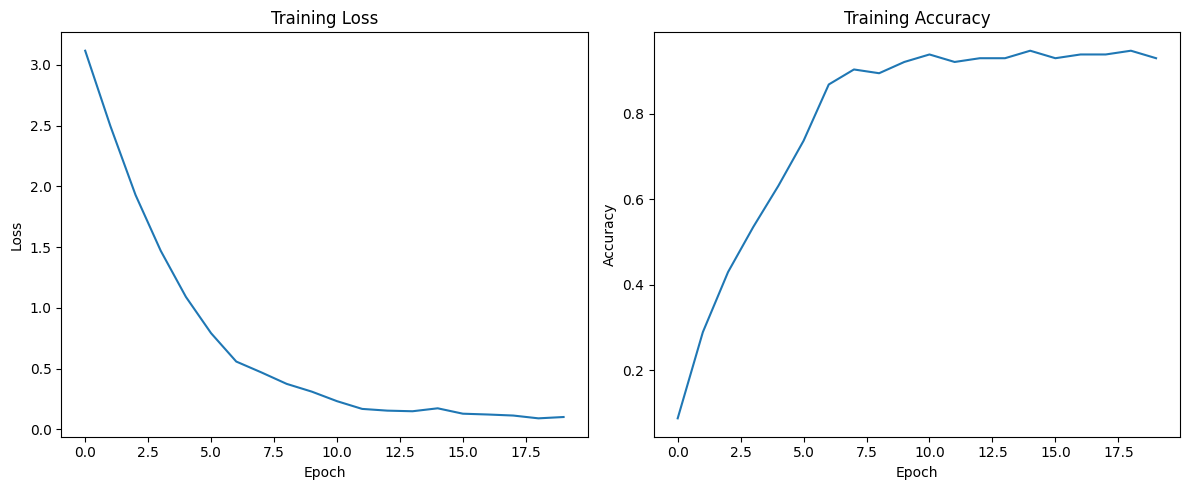

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Set random seed for reproducibility
torch.manual_seed(42)

# ----- DATA PREPARATION -----

# Custom dataset for character-level language modeling
class CharacterDataset(Dataset):
    def __init__(self, text, context_size=3):
        """
        Initialize the character-level dataset.

        Args:
            text (str): The training text
            context_size (int): Number of characters to use as context
        """
        self.text = text
        self.context_size = context_size

        # Create character to index mapping
        self.chars = sorted(list(set(text)))
        self.char_to_idx = {ch: i for i, ch in enumerate(self.chars)}
        self.idx_to_char = {i: ch for i, ch in enumerate(self.chars)}
        self.vocab_size = len(self.chars)

        # Create training samples
        self.X = []
        self.y = []

        for i in range(len(text) - context_size):
            context = text[i:i+context_size]
            target = text[i+context_size]

            # Convert characters to indices
            context_idx = [self.char_to_idx[c] for c in context]
            target_idx = self.char_to_idx[target]

            self.X.append(context_idx)
            self.y.append(target_idx)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.long), torch.tensor(self.y[idx], dtype=torch.long)

    def get_vocab_size(self):
        return self.vocab_size

    def decode(self, indices):
        """Convert a list of indices back to characters"""
        return ''.join([self.idx_to_char[idx.item()] for idx in indices])

# ----- MODEL DEFINITION -----

class TinyLLM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=16, hidden_dim=32, context_size=3):
        """
        Initialize the TinyLLM model.

        Args:
            vocab_size (int): Size of the vocabulary
            embedding_dim (int): Dimension of character embeddings
            hidden_dim (int): Dimension of hidden layer
            context_size (int): Number of characters in the input context
        """
        super(TinyLLM, self).__init__()

        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.context_size = context_size

        # Embedding layer: maps character indices to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # After embedding, the shape will be [batch_size, context_size, embedding_dim]
        # We'll flatten this to [batch_size, context_size * embedding_dim]

        # Linear hidden layer with ReLU activation
        self.hidden = nn.Linear(context_size * embedding_dim, hidden_dim)
        self.relu = nn.ReLU()

        # Output layer: produces logits for each possible next character
        self.output = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, context_size]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, vocab_size]
        """
        # [batch_size, context_size] -> [batch_size, context_size, embedding_dim]
        embedded = self.embedding(x)

        # Checkpoint: Print shape after embedding
        print(f"Shape after embedding: {embedded.shape}")

        # Flatten the embedded context
        # [batch_size, context_size, embedding_dim] -> [batch_size, context_size * embedding_dim]
        flattened = embedded.view(embedded.size(0), -1)

        # Checkpoint: Print shape after flattening
        print(f"Shape after flattening: {flattened.shape}")

        # Pass through hidden layer with ReLU activation
        hidden = self.relu(self.hidden(flattened))

        # Checkpoint: Print shape after hidden layer
        print(f"Shape after hidden layer: {hidden.shape}")

        # Output layer produces logits for next character prediction
        logits = self.output(hidden)

        # Checkpoint: Print shape of output logits
        print(f"Shape of output logits: {logits.shape}")

        return logits

# ----- TRAINING FUNCTION -----

def train_model(model, dataset, epochs=10, batch_size=32, learning_rate=0.01):
    """
    Train the TinyLLM model.

    Args:
        model (nn.Module): The model to train
        dataset (Dataset): The dataset to train on
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training
        learning_rate (float): Learning rate for optimizer

    Returns:
        tuple: Lists of losses and accuracies per epoch
    """
    # Create DataLoader
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store metrics
    losses = []
    accuracies = []

    # Training loop
    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0

        # Disable print statements after first epoch to reduce output
        verbose = (epoch == 0)

        for X_batch, y_batch in dataloader:
            # Forward pass
            logits = model(X_batch)

            # Calculate loss
            loss = criterion(logits, y_batch)
            total_loss += loss.item()

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(logits, 1)
            correct_predictions += (predicted == y_batch).sum().item()
            total_predictions += y_batch.size(0)

        # Calculate epoch metrics
        epoch_loss = total_loss / len(dataloader)
        epoch_accuracy = correct_predictions / total_predictions

        # Store metrics
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)

        # Print epoch results
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    return losses, accuracies

# ----- PREDICTION FUNCTION -----

def predict_next_char(model, dataset, context, topk=3):
    """
    Predict the next character given a context.

    Args:
        model (nn.Module): Trained model
        dataset (CharacterDataset): Dataset containing character mappings
        context (str): Context string to predict from
        topk (int): Number of top predictions to return

    Returns:
        tuple: Most likely next character and probability
    """
    model.eval()  # Set to evaluation mode

    # Make sure context is the right length for the model
    if len(context) > model.context_size:
        context = context[-model.context_size:]
    elif len(context) < model.context_size:
        # Pad with spaces if context is too short (less likely scenario)
        context = ' ' * (model.context_size - len(context)) + context

    # Convert context to indices
    context_idx = [dataset.char_to_idx.get(c, 0) for c in context]  # Use 0 as default if char not found
    x = torch.tensor([context_idx], dtype=torch.long)

    # Get model prediction
    with torch.no_grad():
        logits = model(x)

    # Convert logits to probabilities
    probabilities = torch.softmax(logits, dim=1)

    # Get top k predictions
    topk_probs, topk_indices = torch.topk(probabilities, topk, dim=1)

    # Print top predictions and their probabilities
    print(f"\nPredictions for context '{context}':")
    for i in range(topk):
        char_idx = topk_indices[0][i].item()
        prob = topk_probs[0][i].item()
        char = dataset.idx_to_char[char_idx]
        print(f"  {i+1}. '{char}' with probability {prob:.4f}")

    # Return most likely character and its probability
    best_idx = topk_indices[0][0].item()
    best_char = dataset.idx_to_char[best_idx]
    best_prob = topk_probs[0][0].item()

    return best_char, best_prob

# ----- TEXT GENERATION FUNCTION -----

def generate_text(model, dataset, seed_text, length=20):
    """
    Generate text from the model.

    Args:
        model (nn.Module): Trained model
        dataset (CharacterDataset): Dataset containing character mappings
        seed_text (str): Starting text for generation
        length (int): Number of characters to generate

    Returns:
        str: Generated text
    """
    model.eval()  # Set to evaluation mode
    context_size = model.context_size

    # Make sure seed text is the right length for the model
    if len(seed_text) > context_size:
        context = seed_text[-context_size:]
    else:
        # Pad with spaces if seed is too short
        context = ' ' * (context_size - len(seed_text)) + seed_text

    result = seed_text

    print(f"\nGenerating text from seed: '{seed_text}'")
    print(f"Context: '{context}'")

    # Generate characters one by one
    for _ in range(length):
        # Convert context to indices
        context_idx = [dataset.char_to_idx.get(c, 0) for c in context]  # Use 0 as default if char not found
        x = torch.tensor([context_idx], dtype=torch.long)

        # Get model prediction
        with torch.no_grad():
            logits = model(x)

        # Convert logits to probabilities
        probabilities = torch.softmax(logits, dim=1)

        # Sample from the distribution
        next_char_idx = torch.multinomial(probabilities, 1).item()
        next_char = dataset.idx_to_char[next_char_idx]

        # Update context and result
        context = context[1:] + next_char
        result += next_char

        print(f"Next char: '{next_char}', Updated context: '{context}'")

    return result

import logging
import os
import json
import datetime
import io
from contextlib import redirect_stdout

def setup_logging_and_outputs(base_dir='tiny_llm_outputs'):
    """
    Set up logging and output directories for saving results.

    Args:
        base_dir (str): Base directory for all outputs

    Returns:
        tuple: (log_file_path, model_save_path, results_path)
    """
    # Create timestamp for unique folder
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    output_dir = f"{base_dir}_{timestamp}"

    # Create directories if they don't exist
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(f"{output_dir}/models", exist_ok=True)
    os.makedirs(f"{output_dir}/results", exist_ok=True)

    # Set up logging
    log_file_path = f"{output_dir}/training_log.txt"
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(log_file_path),
            logging.StreamHandler()  # Also output to console
        ]
    )

    # Paths for model and results
    model_save_path = f"{output_dir}/models/tiny_llm_model.pth"
    results_path = f"{output_dir}/results"

    logging.info(f"Output directory created at: {output_dir}")

    return log_file_path, model_save_path, results_path

def save_model_and_metrics(model, losses, accuracies, model_save_path, results_path):
    """
    Save model weights and training metrics.

    Args:
        model (nn.Module): The trained model
        losses (list): List of training losses
        accuracies (list): List of training accuracies
        model_save_path (str): Path to save model weights
        results_path (str): Path to save metrics
    """
    # Save model weights
    torch.save(model.state_dict(), model_save_path)
    logging.info(f"Model saved to {model_save_path}")

    # Save metrics
    metrics = {
        'losses': losses,
        'accuracies': accuracies
    }
    with open(f"{results_path}/training_metrics.json", 'w') as f:
        json.dump(metrics, f)
    logging.info(f"Training metrics saved to {results_path}/training_metrics.json")

    # Save metrics plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.savefig(f"{results_path}/training_metrics.png")
    logging.info(f"Training metrics plot saved to {results_path}/training_metrics.png")

def save_predictions(sample_inputs, predictions, results_path):
    """
    Save model predictions.

    Args:
        sample_inputs (list): List of input strings
        predictions (list): List of (predicted_char, probability) tuples
        results_path (str): Path to save predictions
    """
    results = {}
    for i, (input_text, (pred_char, prob)) in enumerate(zip(sample_inputs, predictions)):
        results[input_text] = {
            'predicted_character': pred_char,
            'probability': prob
        }

    with open(f"{results_path}/predictions.json", 'w') as f:
        json.dump(results, f)
    logging.info(f"Predictions saved to {results_path}/predictions.json")

def save_generated_text(seed_text, generated_text, results_path):
    """
    Save generated text.

    Args:
        seed_text (str): Seed text used for generation
        generated_text (str): Generated text
        results_path (str): Path to save generated text
    """
    with open(f"{results_path}/generated_text.txt", 'w') as f:
        f.write(f"Seed: {seed_text}\n\n")
        f.write(f"Generated text: {generated_text}")
    logging.info(f"Generated text saved to {results_path}/generated_text.txt")

def capture_output(func, *args, **kwargs):
    """
    Capture stdout output from a function.

    Args:
        func: Function to call
        *args, **kwargs: Arguments to pass to the function

    Returns:
        tuple: (function return value, captured output)
    """
    f = io.StringIO()
    with redirect_stdout(f):
        result = func(*args, **kwargs)
    output = f.getvalue()
    return result, output

def save_dataset_info(dataset, results_path):
    """
    Save dataset information.

    Args:
        dataset (CharacterDataset): Dataset object
        results_path (str): Path to save dataset info
    """
    dataset_info = {
        'vocab_size': dataset.vocab_size,
        'context_size': dataset.context_size,
        'vocabulary': dataset.chars,
        'char_to_idx': dataset.char_to_idx,
        'num_samples': len(dataset)
    }

    with open(f"{results_path}/dataset_info.json", 'w') as f:
        json.dump(dataset_info, f)
    logging.info(f"Dataset info saved to {results_path}/dataset_info.json")

# ----- MAIN EXECUTION -----
def main():
    # Set up logging and output directories
    log_file, model_save_path, results_path = setup_logging_and_outputs()
    logging.info("Starting TinyLLM training and evaluation")

    # Define training text
    text = "hello world. this is a tiny language model. it can learn simple patterns from text data. let's see how well it works!"
    logging.info(f"Training text: '{text}'")

    # Create dataset
    context_size = 3
    dataset = CharacterDataset(text, context_size=context_size)
    save_dataset_info(dataset, results_path)

    # Print dataset information
    logging.info(f"Vocabulary size: {dataset.vocab_size}")

    # Checkpoint: Show sample from dataset
    logging.info("\n----- TOKENIZATION CHECKPOINT -----")
    for i in range(3):
        X, y = dataset[i]
        context_chars = dataset.decode(X)
        target_char = dataset.idx_to_char[y.item()]
        logging.info(f"Sample {i+1}: Input '{context_chars}' -> Target '{target_char}'")

    # Create model
    vocab_size = dataset.get_vocab_size()
    model = TinyLLM(vocab_size, embedding_dim=16, hidden_dim=32, context_size=context_size)

    # Print model information
    logging.info("\n----- MODEL ARCHITECTURE -----")
    model_architecture = str(model)
    logging.info(model_architecture)
    with open(f"{results_path}/model_architecture.txt", 'w') as f:
        f.write(model_architecture)

    # Test a forward pass
    logging.info("\n----- FORWARD PASS CHECKPOINT -----")
    X_sample, y_sample = dataset[0]
    X_sample = X_sample.unsqueeze(0)  # Add batch dimension

    # Capture output of forward pass
    def forward_pass():
        output = model(X_sample)
        print(f"Input shape: {X_sample.shape}")
        print(f"Output shape: {output.shape}")
        return output

    output, forward_output = capture_output(forward_pass)
    logging.info(forward_output)

    # Train the model
    logging.info("\n----- TRAINING CHECKPOINT -----")

    # Capture output of training
    def training():
        return train_model(model, dataset, epochs=20, batch_size=8, learning_rate=0.01)

    (losses, accuracies), training_output = capture_output(training)
    logging.info(training_output)

    # Save model and metrics
    save_model_and_metrics(model, losses, accuracies, model_save_path, results_path)

    # Test the model with sample inputs
    logging.info("\n----- SAMPLE INPUTS/OUTPUTS -----")
    sample_inputs = ["hel", "wor", "thi"]
    predictions = []

    for sample in sample_inputs:
        # Capture output of prediction
        def predict():
            return predict_next_char(model, dataset, sample)

        (next_char, prob), prediction_output = capture_output(predict)
        logging.info(prediction_output)
        logging.info(f"Input: '{sample}' -> Predicted next character: '{next_char}' (probability: {prob:.4f})")
        predictions.append((next_char, prob))

    save_predictions(sample_inputs, predictions, results_path)

    # Test with custom string
    custom_test = "the "
    logging.info("\n----- CUSTOM TEST STRING -----")

    # Capture output of custom test
    def custom_predict():
        return predict_next_char(model, dataset, custom_test)

    (next_char, prob), custom_output = capture_output(custom_predict)
    logging.info(custom_output)
    logging.info(f"Input: '{custom_test}' -> Predicted next character: '{next_char}' (probability: {prob:.4f})")

    # Generate text
    logging.info("\n----- TEXT GENERATION -----")
    seed = "hel"

    # Capture output of text generation
    def generate():
        return generate_text(model, dataset, seed, length=30)

    generated_text, generation_output = capture_output(generate)
    logging.info(generation_output)
    logging.info(f"\nGenerated text (seed: '{seed}'): '{generated_text}'")

    save_generated_text(seed, generated_text, results_path)

    # Final thoughts
    logging.info("\n----- FUTURE IMPROVEMENTS -----")
    improvements = [
        "1. Increase model capacity with more layers or recurrent/transformer architecture",
        "2. Move to word-level or subword-level tokenization for better semantic understanding",
        "3. Use larger dataset for training",
        "4. Implement temperature scaling for more diverse text generation",
        "5. Add attention mechanisms for handling longer contexts"
    ]

    for improvement in improvements:
        logging.info(improvement)

    with open(f"{results_path}/improvement_suggestions.txt", 'w') as f:
        f.write("\n".join(improvements))

    logging.info(f"\nAll results saved to directory: {os.path.dirname(log_file)}")

if __name__ == "__main__":
    main()